In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('matches.csv')

In [3]:
test = pd.read_csv('val.csv')

In [4]:
train.shape

(1878, 9)

In [5]:
test.shape

(89, 9)

In [6]:
train.head(5)

,Berlin,Frankfurt,2-1,2.21,3.05,2.92,1.31,2.72,13:18
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13:15
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12:42
2,TorinoJuve,Μιλάνο,2-1,2.12,2.99,3.2,1.51,2.15,12:39
3,Περιστέρι,BetisGreens,0-1,2.44,2.54,3.15,1.49,2.18,12:36
4,FCBergamo,Νάπολι,1-3,2.66,2.39,3.05,1.43,2.33,12:27


In [7]:
test.head(5)

,MadridAthletes,BetisGreens,2-1,2.06,3.3,3.05,1.37,2.52,13:21
0,Berlin,Φράιμπουργκ,3-2,2.26,2.88,3.05,1.39,2.43,13:18
1,KievWhites,Μπεσίκτας,4-0,2.22,2.85,3.1,1.46,2.25,13:15
2,ΓουέστΧαμ,Έβερτον,0-2,2.62,2.37,3.15,1.49,2.18,13:12
3,Rennais,Αντβέρπ,3-0,2.27,2.7,3.25,1.56,2.05,13:06
4,YoungBoysFC,BelgradeReds,1-3,2.39,2.68,3.05,1.40,2.41,13:03


In [8]:
replacers = ['team1','team2','score','team1_odds','x_odds','team2_odds','under','over','time']


cols_t = train.columns

for i in range(len(cols_t)):
    train.rename(columns = {cols_t[i] : replacers[i]},inplace=True)
    
    
cols_test = test.columns
for i in range(len(cols_test)):
    test.rename(columns = {cols_test[i] : replacers[i]},inplace=True)

In [9]:
train.head(2)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13:15
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12:42


In [10]:
test.head(2)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time
0,Berlin,Φράιμπουργκ,3-2,2.26,2.88,3.05,1.39,2.43,13:18
1,KievWhites,Μπεσίκτας,4-0,2.22,2.85,3.1,1.46,2.25,13:15


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team1       1878 non-null   object 
 1   team2       1878 non-null   object 
 2   score       1878 non-null   object 
 3   team1_odds  1878 non-null   object 
 4   x_odds      1878 non-null   object 
 5   team2_odds  1878 non-null   object 
 6   under       1878 non-null   float64
 7   over        1878 non-null   float64
 8   time        1878 non-null   object 
dtypes: float64(2), object(7)
memory usage: 132.2+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team1       89 non-null     object 
 1   team2       89 non-null     object 
 2   score       89 non-null     object 
 3   team1_odds  89 non-null     object 
 4   x_odds      89 non-null     object 
 5   team2_odds  89 non-null     object 
 6   under       89 non-null     float64
 7   over        89 non-null     float64
 8   time        89 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB


In [13]:
train.drop(index=36,inplace=True)

In [14]:
train['team1_odds'] = train['team1_odds'].astype(np.float64)
train['team2_odds'] = train['team2_odds'].astype(np.float64)
train['x_odds'] = train['x_odds'].astype(np.float64)



test['team1_odds'] = test['team1_odds'].astype(np.float64)
test['team2_odds'] = test['team2_odds'].astype(np.float64)
test['x_odds'] = test['x_odds'].astype(np.float64)

In [15]:
train.iloc[788,:]

team1           Frankfurt
team2         Φράιμπουργκ
score                 2-1
team1_odds           2.42
x_odds               2.72
team2_odds           2.95
under                1.34
over                 2.59
time                08:24
Name: 789, dtype: object

In [16]:
train.drop(index=788,inplace=True)

train['time'] = pd.to_datetime(train['time'],format = '%H:%M')
train['hour'] = train.time.dt.hour
train['minute'] = train.time.dt.minute

In [17]:
test['time'] = pd.to_datetime(test['time'],format = '%H:%M')
test['hour'] = test.time.dt.hour
test['minute'] = test.time.dt.minute

In [18]:
train.drop(columns=['time'],inplace=True)
test.drop(columns=['time'],inplace=True)

In [19]:
train.head(2)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,hour,minute
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13,15
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12,42


In [20]:
test.head(3)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,hour,minute
0,Berlin,Φράιμπουργκ,3-2,2.26,2.88,3.05,1.39,2.43,13,18
1,KievWhites,Μπεσίκτας,4-0,2.22,2.85,3.10,1.46,2.25,13,15
2,ΓουέστΧαμ,Έβερτον,0-2,2.62,2.37,3.15,1.49,2.18,13,12


In [21]:
train_scores = []


train_scores_1 = train['score'].str[0].values.astype(np.int64)
train_scores_2 = train['score'].str[2].values.astype(np.int64)

total_scores_train = []

for i in range(len(train_scores_1)):
    total_scores_train.append(train_scores_1[i] + train_scores_2[i])
    
    
result_train = []

for i in range(len(total_scores_train)):
    if total_scores_train[i]  > 2.5:
        result_train.append(1)
    else:
        result_train.append(0)
        
        
train['result'] = result_train

In [22]:
test_scores = []


test_scores_1 = test['score'].str[0].values.astype(np.int64)
test_scores_2 = test['score'].str[2].values.astype(np.int64)

total_scores_test = []

for i in range(len(test_scores_1)):
    total_scores_test.append(test_scores_1[i] + test_scores_2[i])
    
    
result_test = []

for i in range(len(total_scores_test)):
    if total_scores_test[i]  > 2.5:
        result_test.append(1)
    else:
        result_test.append(0)
        
        
test['result'] = result_test

In [23]:
train.head(5)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,hour,minute,result
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13,15,0
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12,42,1
2,TorinoJuve,Μιλάνο,2-1,2.12,2.99,3.20,1.51,2.15,12,39,1
3,Περιστέρι,BetisGreens,0-1,2.44,2.54,3.15,1.49,2.18,12,36,0
4,FCBergamo,Νάπολι,1-3,2.66,2.39,3.05,1.43,2.33,12,27,1


In [24]:
test.head(5)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,hour,minute,result
0,Berlin,Φράιμπουργκ,3-2,2.26,2.88,3.05,1.39,2.43,13,18,1
1,KievWhites,Μπεσίκτας,4-0,2.22,2.85,3.10,1.46,2.25,13,15,1
2,ΓουέστΧαμ,Έβερτον,0-2,2.62,2.37,3.15,1.49,2.18,13,12,0
3,Rennais,Αντβέρπ,3-0,2.27,2.70,3.25,1.56,2.05,13,6,1
4,YoungBoysFC,BelgradeReds,1-3,2.39,2.68,3.05,1.40,2.41,13,3,1


In [25]:
t1 = train.team1.unique()
t2 = test.team1.unique()

for i in range(len(t2)):
    if t2[i] not in t1:
        print(t2[i])

Μίλαν


In [26]:
t1 = train.team2.unique()
t2 = test.team2.unique()

for i in range(len(t2)):
    if t2[i] not in t1:
        print(t2[i])

In [27]:
test.loc[test['team1'] == 'Μίλαν']

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,hour,minute,result
14,Μίλαν,Laziali,2-0,2.2,3.0,3.0,1.36,2.53,12,27,0


In [28]:
test.drop(index=14,inplace=True)

In [29]:
teams = dict()


for i , j in enumerate(train.team1.unique()):
    if i not in teams.keys():
        teams[j] = i

In [30]:
teams

{'ΔικέφαλοςΒορρά': 0,
 'Ναντ': 1,
 'TorinoJuve': 2,
 'Περιστέρι': 3,
 'FCBergamo': 4,
 'Fener': 5,
 'Λέστερ': 6,
 'Μπράγκα': 7,
 'CelticGreens': 8,
 'Ένωση': 9,
 'Real': 10,
 'Σεβίλλη': 11,
 'Ντόρτμουντ': 12,
 'Μονακό': 13,
 'Lipsia': 14,
 'Σάλτσμπουργκ': 15,
 'Κοπεγχάγη': 16,
 'Rennais': 17,
 'Ρέιντζερς': 18,
 'Λίβερπουλ': 19,
 'ΚίτρινοιΒορρά': 20,
 'Monchengladbach': 21,
 'Eindhoven': 22,
 'Αγρίνιο': 23,
 'ΚρίσταλΠάλας': 24,
 'ManchesterBlue': 25,
 'Βόλος': 26,
 'Ιωάννινα': 27,
 'Μπρέντφορντ': 28,
 'Χόφενχαϊμ': 29,
 'Λεβερκούζεν': 30,
 'Λυών': 31,
 'Παρί': 32,
 'Πράσινοι': 33,
 'Τρίπολη': 34,
 'BocaBoys': 35,
 'LisbonEagles': 36,
 'Partisans': 37,
 'Νάπολι': 38,
 'Basaksehir': 39,
 'Udine': 40,
 'Βερόνα': 41,
 'Μπόρνμουθ': 42,
 'ShakhtarUnited': 43,
 'VillaLions': 44,
 'FeyenordReds': 45,
 'Ερυθρόλευκοι': 46,
 'Anderlecht': 47,
 'Φράιμπουργκ': 48,
 'Laziali': 49,
 'Λειβαδιά': 50,
 'WolvesCity': 51,
 'Ηράκλειο': 52,
 'MunichReds': 53,
 'Frankfurt': 54,
 'Μάριμπορ': 55,
 'Plzen': 56,
 

In [31]:
teams1 = []

t1 = train.team1.values

for i in range(len(t1)):
    for key,value in teams.items():
        if t1[i] == key:
            teams1.append(value)
            
            
teams2 = []

t2 = train.team2.values

for i in range(len(t2)):
    for key,value in teams.items():
        if t2[i] == key:
            teams2.append(value)
            
train['team1_'] = teams1
train['team2_'] = teams2

In [32]:
teams1 = []

t1 = test.team1.values

for i in range(len(t1)):
    for key,value in teams.items():
        if t1[i] == key:
            teams1.append(value)
            
            
teams2 = []

t2 = test.team2.values

for i in range(len(t2)):
    for key,value in teams.items():
        if t2[i] == key:
            teams2.append(value)
            
test['team1_'] = teams1
test['team2_'] = teams2

In [33]:
train.head(2)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,hour,minute,result,team1_,team2_
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13,15,0,0,100
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12,42,1,1,29


In [34]:
test.head(3)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,hour,minute,result,team1_,team2_
0,Berlin,Φράιμπουργκ,3-2,2.26,2.88,3.05,1.39,2.43,13,18,1,62,48
1,KievWhites,Μπεσίκτας,4-0,2.22,2.85,3.10,1.46,2.25,13,15,1,98,80
2,ΓουέστΧαμ,Έβερτον,0-2,2.62,2.37,3.15,1.49,2.18,13,12,0,83,104


In [35]:
train.drop(columns=['team1' , 'team2','score'],inplace=True)
test.drop(columns=['team1' , 'team2','score'],inplace=True)

In [36]:
train = train[['team1_','team2_','team1_odds','team2_odds','x_odds','under','over','hour','minute','result']]
test = test[['team1_','team2_','team1_odds','team2_odds','x_odds','under','over','hour','minute','result']]

In [37]:
train.head(2)

,team1_,team2_,team1_odds,team2_odds,x_odds,under,over,hour,minute,result
0,0,100,2.94,3.15,2.17,1.46,2.25,13,15,0
1,1,29,2.76,3.05,2.33,1.40,2.41,12,42,1


In [38]:
test.head(2)

,team1_,team2_,team1_odds,team2_odds,x_odds,under,over,hour,minute,result
0,62,48,2.26,3.05,2.88,1.39,2.43,13,18,1
1,98,80,2.22,3.10,2.85,1.46,2.25,13,15,1


In [39]:
x_train  = train.iloc[:,:-1].values
y_train  = train.iloc[:,-1].values

x_test  = test.iloc[:,:-1].values
y_test  = test.iloc[:,-1].values

In [40]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
from sklearn.metrics import accuracy_score , f1_score,recall_score,precision_score,confusion_matrix
import seaborn as sns

history = []


def metrics(estimator , pred , actual = y_test ,hist = history ):
    new = []
    accuracy = accuracy_score(pred,actual)
    f1 = f1_score(pred,actual)
    recall = recall_score(pred,actual)
    precision = precision_score(pred,actual)
    cm = confusion_matrix(pred,actual)
    
    new.append((estimator , accuracy, f1,recall,precision))
    print(f'estimator {estimator} had accuracy score = {accuracy}')
    sns.heatmap(cm,annot=True,  fmt='.0f')
    hist.append(new)

In [42]:
from sklearn.model_selection import GridSearchCV

def grid(params , estimator , x = x_train , y = y_train):
    grid_s = GridSearchCV(estimator = estimator , param_grid = params , scoring='accuracy',cv=8 , refit=False)
    grid_s.fit(x,y)
    best_acc = grid_s.best_score_
    best_params = grid_s.best_params_
    print(f'best score = {best_acc}')
    print(f'best params = {best_params}')

In [43]:
import warnings

warnings.filterwarnings('ignore')

In [44]:
from sklearn.tree import DecisionTreeClassifier
params = {'criterion':['gini','entropy','log_loss'] ,'max_features':['auto','sqrt',';log2'],'min_samples_split':[1,2,3]}

tree = DecisionTreeClassifier()
grid(params,tree)

best score = 0.5132910529187125
best params = {'criterion': 'log_loss', 'max_features': 'sqrt', 'min_samples_split': 3}


estimator DecisionTreeClassifier(criterion='log_loss', max_features='sqrt',
                       min_samples_split=3) had accuracy score = 0.5340909090909091


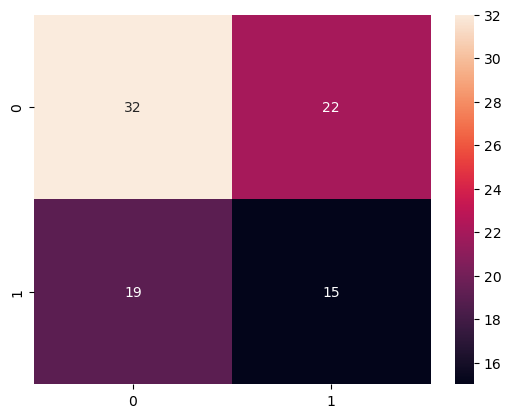

In [63]:
tree = DecisionTreeClassifier(criterion = 'log_loss' , max_features = 'sqrt' , min_samples_split=3)

tree.fit(x_train,y_train)

tree_preds = tree.predict(x_test)

metrics(tree,tree_preds)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors':[3,4,5,6,7] , 'algorithm' : ['auto','ball_tree' ,'kd_tree', 'brute']}

gitonas  = KNeighborsClassifier()

grid(params,gitonas)

best score = 0.5207992362247682
best params = {'algorithm': 'auto', 'n_neighbors': 4}


estimator KNeighborsClassifier(n_neighbors=4) had accuracy score = 0.6022727272727273


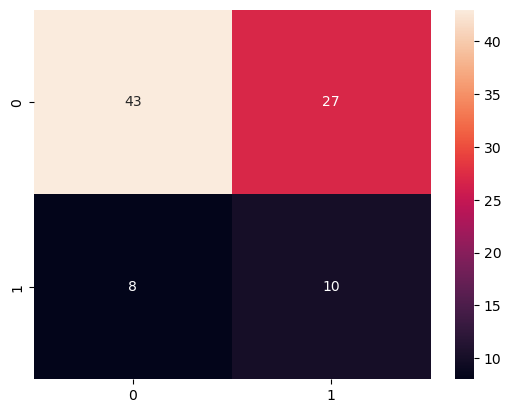

In [47]:
gitonas  = KNeighborsClassifier(algorithm='auto' ,n_neighbors=4 )
gitonas.fit(x_train,y_train)
gitonas_pred = gitonas.predict(x_test)
metrics(gitonas , gitonas_pred)


In [48]:
from sklearn.ensemble import RandomForestClassifier 
params = {'n_estimators':[50,100,150] , 'criterion' : ['gini', 'entropy' , 'log_loss'] , 'min_samples_split':[1,2,3,4]}
forest = RandomForestClassifier()
grid(params,forest)

    

best score = 0.5234724495362792
best params = {'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 50}


estimator RandomForestClassifier(min_samples_split=4) had accuracy score = 0.5568181818181818


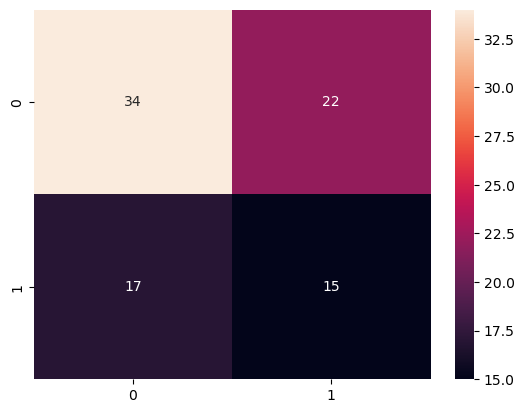

In [49]:
forest = RandomForestClassifier(criterion = 'gini' , min_samples_split=4)
forest.fit(x_train,y_train)
forest_pred = forest.predict(x_test)
metrics(forest,forest_pred)

In [50]:
from sklearn.linear_model import LogisticRegression

params = {'penalty':['l1','l2','elasticnet'], 'solver':['lbfgs','liblinear']}

logistic = LogisticRegression()
grid(params,logistic)

best score = 0.5458628841607565
best params = {'penalty': 'l1', 'solver': 'liblinear'}


estimator LogisticRegression(penalty='l1', solver='liblinear') had accuracy score = 0.5454545454545454


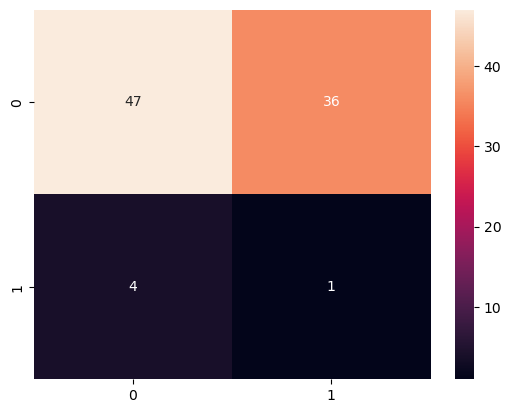

In [51]:
logistic = LogisticRegression(penalty  = 'l1' , solver = 'liblinear')
logistic.fit(x_train,y_train)
log_preds = logistic.predict(x_test)
metrics(logistic,log_preds)



estimator GaussianNB() had accuracy score = 0.5568181818181818


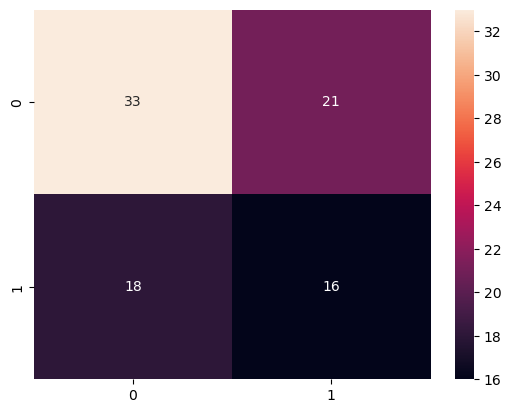

In [52]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(x_train,y_train)
bayes_pred = bayes.predict(x_test)
metrics(bayes,bayes_pred)

estimator XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) had accuracy score = 0.5568181818181818


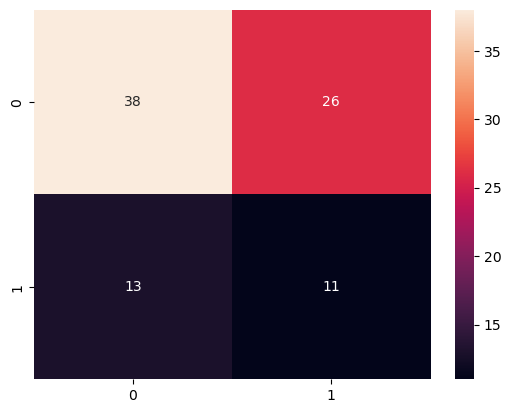

In [53]:
from xgboost import XGBClassifier


xgb = XGBClassifier(
learning_rate = 0.01,
n_estimators=500,
max_depth=3)
xgb.fit(x_train,y_train)
xbg_preds = xgb.predict(x_test)
metrics(xgb,xbg_preds)

In [54]:
x_train[0].shape

(9,)

In [55]:
import tensorflow as tf


from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import *

In [56]:
model = Sequential()
model.add(Input(9,))
model.add(Dense(10,'relu'))
model.add(Dense(1,'sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(x_train,y_train,validation_data=[x_test,y_test],epochs=20,batch_size=3)

Epoch 1/20


626/626 [==============================] - 3s 2ms/step - loss: 0.7041 - accuracy: 0.5362 - val_loss: 0.6829 - val_accuracy: 0.5568
Epoch 2/20
626/626 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5522 - val_loss: 0.6827 - val_accuracy: 0.5909
Epoch 3/20
626/626 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.5576 - val_loss: 0.6842 - val_accuracy: 0.5909
Epoch 4/20
626/626 [==============================] - 1s 2ms/step - loss: 0.6866 - accuracy: 0.5597 - val_loss: 0.6845 - val_accuracy: 0.6023
Epoch 5/20
626/626 [==============================] - 1s 2ms/step - loss: 0.6854 - accuracy: 0.5608 - val_loss: 0.6840 - val_accuracy: 0.6023
Epoch 6/20
626/626 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.5666 - val_loss: 0.6833 - val_accuracy: 0.5909
Epoch 7/20
626/626 [==============================] - 1s 2ms/step - loss: 0.6844 - accuracy: 0.5576 - val_loss: 0.6856 - val_accuracy: 0.6250
Epoc

In [58]:
deep_preds = model.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [59]:
deep_preds = deep_preds.flatten()

In [60]:
tf_preds = []

for i in range(len(deep_preds)):
    if deep_preds[i] >= 0.5:
        tf_preds.append(1)
    else:
        tf_preds.append(0)

estimator <keras.src.engine.sequential.Sequential object at 0x0000020BB62BFB10> had accuracy score = 0.5454545454545454


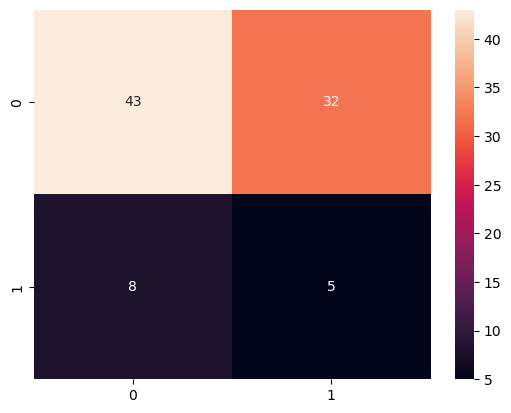

In [61]:
metrics(model, tf_preds)

In [62]:
history

[[(DecisionTreeClassifier(max_features='sqrt'),
   0.4772727272727273,
   0.425,
   0.3953488372093023,
   0.4594594594594595)],
 [(KNeighborsClassifier(n_neighbors=4),
   0.6022727272727273,
   0.36363636363636365,
   0.5555555555555556,
   0.2702702702702703)],
 [(RandomForestClassifier(min_samples_split=4),
   0.5568181818181818,
   0.43478260869565216,
   0.46875,
   0.40540540540540543)],
 [(LogisticRegression(penalty='l1', solver='liblinear'),
   0.5454545454545454,
   0.047619047619047616,
   0.2,
   0.02702702702702703)],
 [(GaussianNB(),
   0.5568181818181818,
   0.4507042253521127,
   0.47058823529411764,
   0.43243243243243246)],
 [(XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_typ

In [65]:
history[0][0]

(DecisionTreeClassifier(max_features='sqrt'),
 0.4772727272727273,
 0.425,
 0.3953488372093023,
 0.4594594594594595)

In [67]:
names = []
accuracy = []
f1 = []
recall = []
precision = []


for i in range(len(history)):
    names.append(history[i][0][0])
    accuracy.append(history[i][0][1])
    f1.append(history[i][0][2])
    recall.append(history[i][0][3])
    precision.append(history[i][0][4])
    
results = pd.DataFrame({'name':names,'accuracy':accuracy,'f1':f1,'recall':recall,'precision':precision})

In [68]:
results.sort_values(by='accuracy',ascending=False,inplace=True)

In [69]:
results

,name,accuracy,f1,recall,precision
1,KNeighborsClassifier(n_neighbors=4),0.602273,0.363636,0.555556,0.270270
2,"(DecisionTreeClassifier(max_features='sqrt', m...",0.556818,0.434783,0.468750,0.405405
4,GaussianNB(),0.556818,0.450704,0.470588,0.432432
5,"XGBClassifier(base_score=None, booster=None, c...",0.556818,0.360656,0.458333,0.297297
3,"LogisticRegression(penalty='l1', solver='libli...",0.545455,0.047619,0.200000,0.027027
6,<keras.src.engine.sequential.Sequential object...,0.545455,0.200000,0.384615,0.135135
7,"DecisionTreeClassifier(criterion='log_loss', m...",0.534091,0.422535,0.441176,0.405405
0,DecisionTreeClassifier(max_features='sqrt'),0.477273,0.425000,0.395349,0.459459


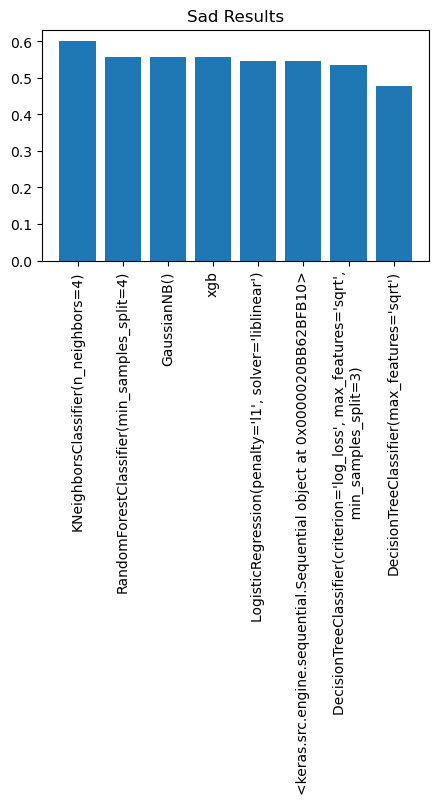

In [75]:
results.iloc[3,0] = 'xgb'


import matplotlib.pyplot as plt


plt.figure(figsize=(5,3))
plt.bar(results['name'].astype('str').values,results['accuracy'].values)
plt.xticks(rotation=90)
plt.title('Sad Results')
plt.show()